# 📘 Kesifsel Veri Analizi

In [ ]:
# Keşifsel Veri Analizi (EDA)
#Bu bölümde HMEQ veri seti üzerinden temel veri yapısı incelenecek, eksik veriler analiz edilecek, değişken dağılımları ve korelasyonlar görselleştirilecektir.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Veri setini yükleme
df = pd.read_csv("hmeq.csv")

#Genel Bilgiler
print("Veri seti boyutu:", df.shape)
print("\nVeri tipleri ve eksik değer durumu:\n")
print(df.info())


Veri seti boyutu: (5960, 13)

Veri tipleri ve eksik değer durumu:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB
None


In [ ]:
# Eksik Veri Analizi
missing = df.isnull().sum()
missing_percent = 100 * missing / len(df)
missing_df = pd.DataFrame({
    'Eksik Değer Sayısı': missing,
    'Yüzde (%)': missing_percent
}).sort_values(by='Eksik Değer Sayısı', ascending=False)

missing_df[missing_df["Eksik Değer Sayısı"] > 0]


,Eksik Değer Sayısı,Yüzde (%)
DEBTINC,1267,21.258389
DEROG,708,11.879195
DELINQ,580,9.731544
MORTDUE,518,8.691275
YOJ,515,8.640940
NINQ,510,8.557047
CLAGE,308,5.167785
JOB,279,4.681208
REASON,252,4.228188
CLNO,222,3.724832


In [10]:
#İstatistiksel Özet
df.describe().T


,count,mean,std,min,25%,50%,75%,max
BAD,5960.0,0.199497,0.399656,0.000000,0.000000,0.000000,0.000000,1.000000
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000


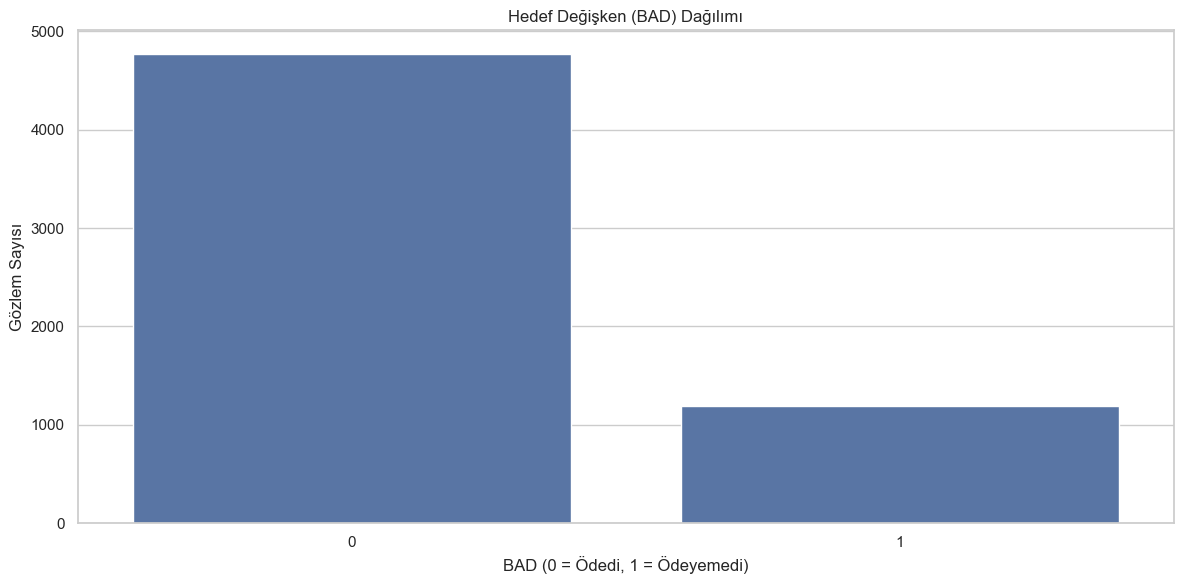

In [17]:
# Hedef Değişken Dağılımı
sns.countplot(x='BAD', data=df)
plt.title("Hedef Değişken (BAD) Dağılımı")
plt.xlabel("BAD (0 = Ödedi, 1 = Ödeyemedi)")
plt.ylabel("Gözlem Sayısı")
plt.tight_layout()
plt.show()


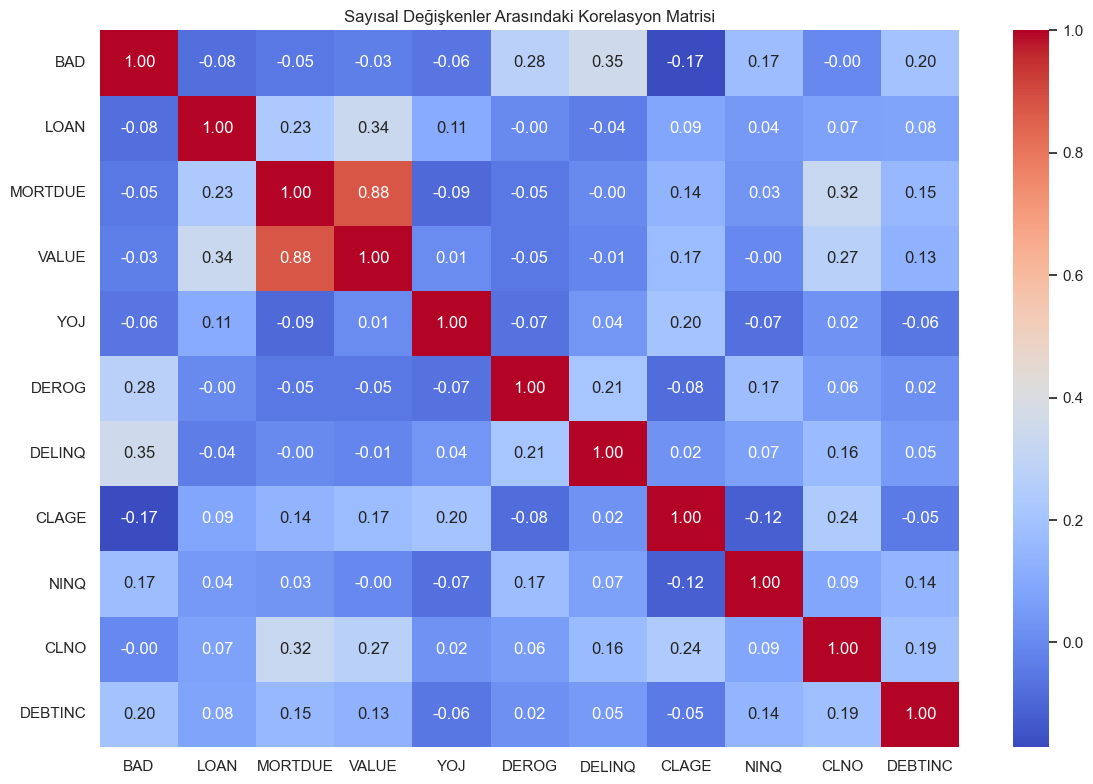

In [14]:
#Korelasyon Matrisi (Sayısal Değişkenler)
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Sayısal Değişkenler Arasındaki Korelasyon Matrisi")
plt.tight_layout()
plt.show()


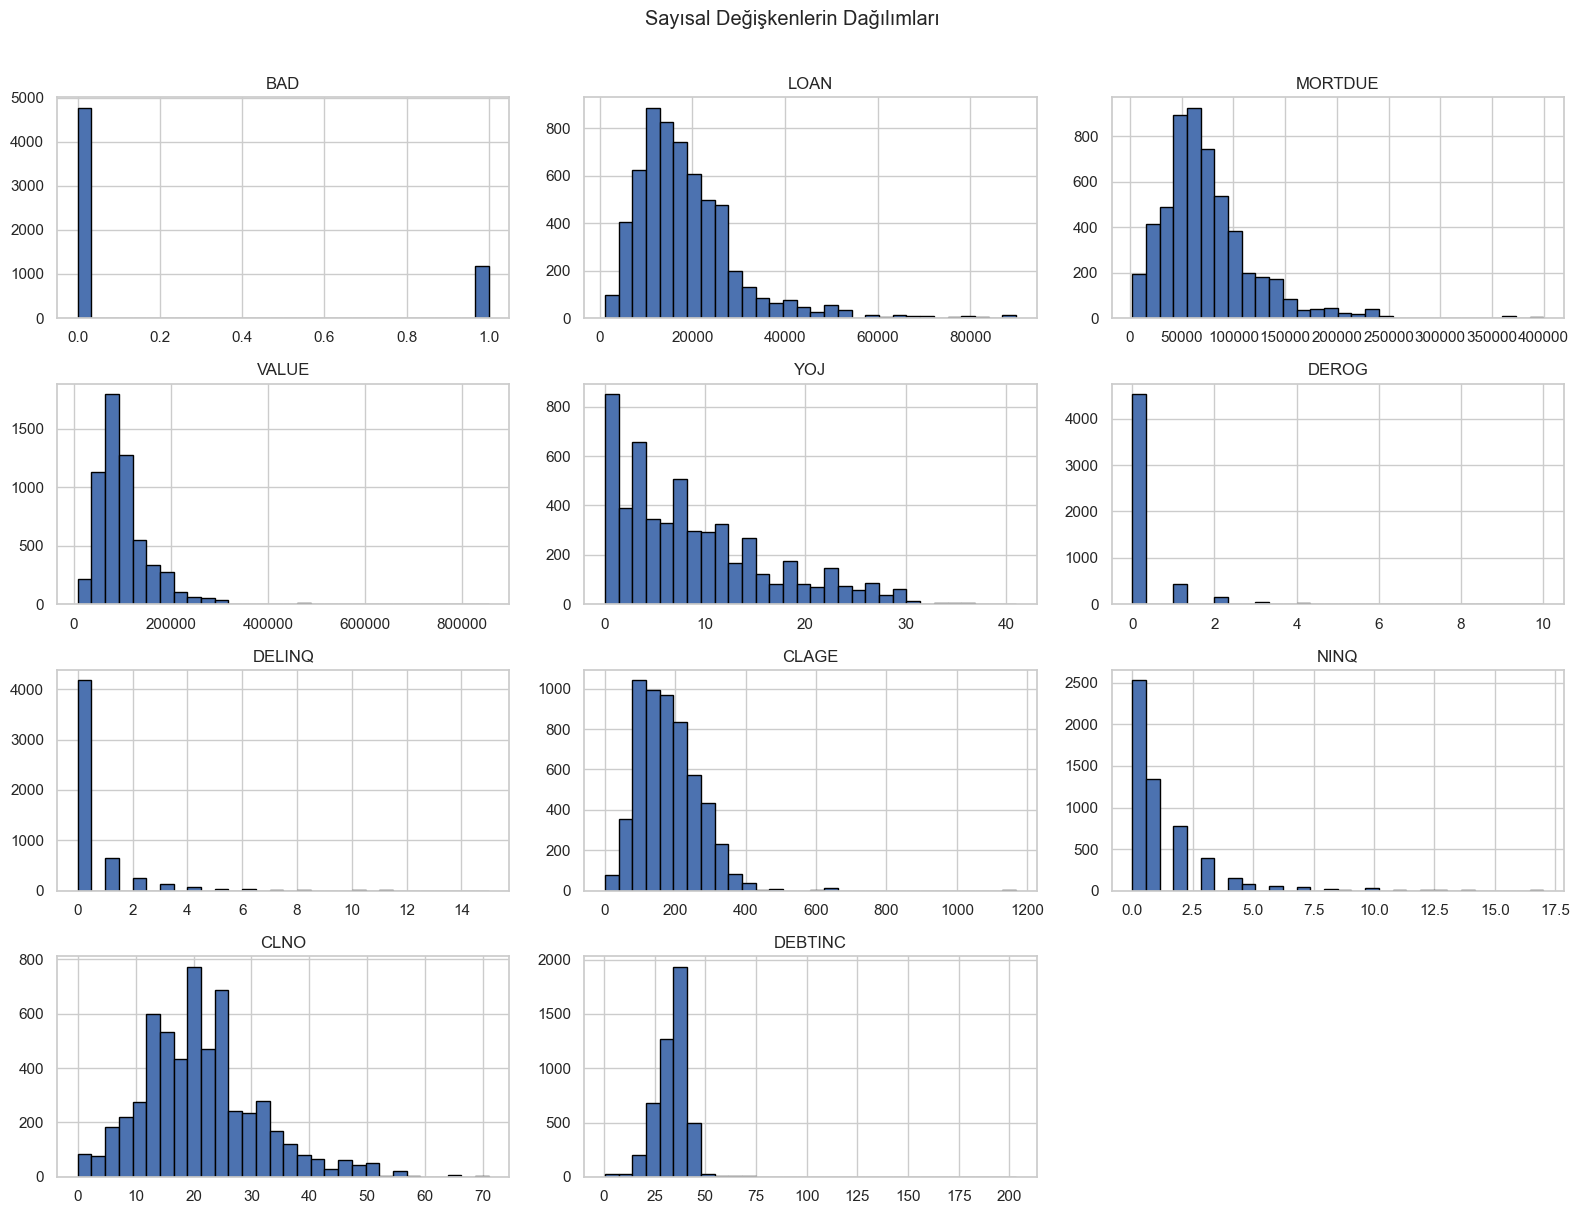

In [15]:
#Sayısal Değişkenlerin Dağılımları
df[numeric_cols].hist(bins=30, figsize=(16, 12), edgecolor='black')
plt.suptitle("Sayısal Değişkenlerin Dağılımları", y=1.01)
plt.tight_layout()
plt.show()


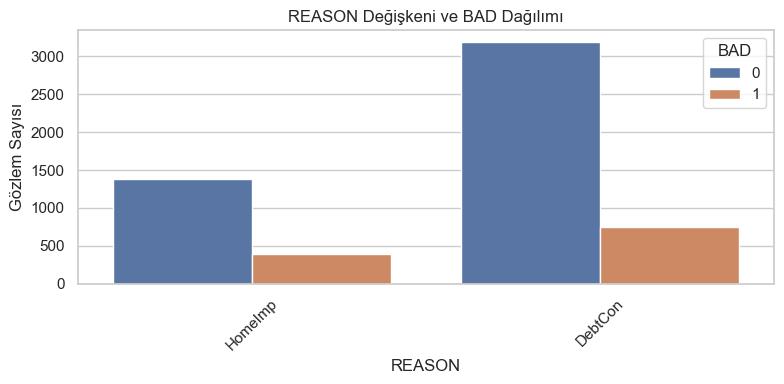

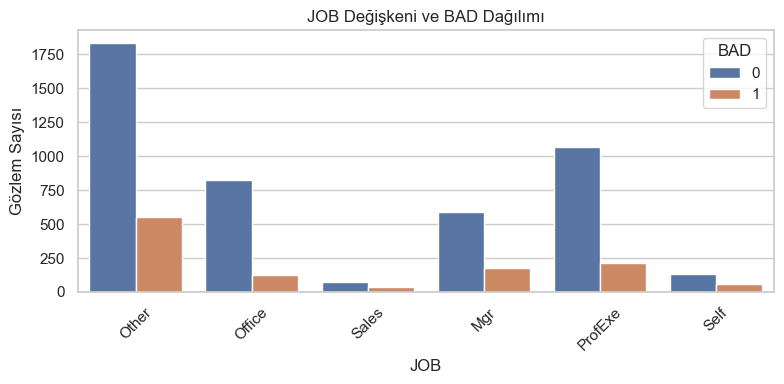

In [16]:
#Kategorik Değişkenlerin BAD ile İlişkisi
categorical_cols = ['REASON', 'JOB']

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue='BAD')
    plt.title(f"{col} Değişkeni ve BAD Dağılımı")
    plt.xlabel(col)
    plt.ylabel("Gözlem Sayısı")
    plt.xticks(rotation=45)
    plt.legend(title='BAD')
    plt.tight_layout()
    plt.show()


# 📘 Veri On Isleme

In [ ]:
# Veri Ön İşleme (Eksik Veri İşleme – Gelişmiş Yöntem)
#Bu bölümde eksik veriler model tabanlı yöntemler ile doldurulmuş, kategorik değişkenlerde özel etiketler kullanılmıştır.

In [4]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Veri setini tekrar yükleyelim
df = pd.read_csv("hmeq.csv")


In [5]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("Eksik değer içeren değişkenler:\n")
print(missing)


Eksik değer içeren değişkenler:

DEBTINC    1267
DEROG       708
DELINQ      580
MORTDUE     518
YOJ         515
NINQ        510
CLAGE       308
JOB         279
REASON      252
CLNO        222
VALUE       112
dtype: int64


# 📘 Lojistik Regresyon Model Gelistirme

In [1]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Veri yükleme
df = pd.read_csv("hmeq.csv")

# Kategorik eksik değerleri 'Unknown' olarak doldurma
df['REASON'] = df['REASON'].fillna("Unknown")
df['JOB'] = df['JOB'].fillna("Unknown")

# Sayısal değişkenler (BAD hariç)
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('BAD')
imputer = IterativeImputer(random_state=42)
df[num_cols] = imputer.fit_transform(df[num_cols])

# Label Encoding
le = LabelEncoder()
df['REASON'] = le.fit_transform(df['REASON'])
df['JOB'] = le.fit_transform(df['JOB'])

# Feature ve target ayrımı
X = df.drop('BAD', axis=1)
y = df['BAD']

# Ölçekleme
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# Eğitim-test ayırımı
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


c:\Users\ahmet\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Accuracy: 0.7374161073825504
Precision: 0.391304347826087
Recall: 0.5672268907563025
F1 Score: 0.4631217838765009
ROC AUC: 0.7611163962440322


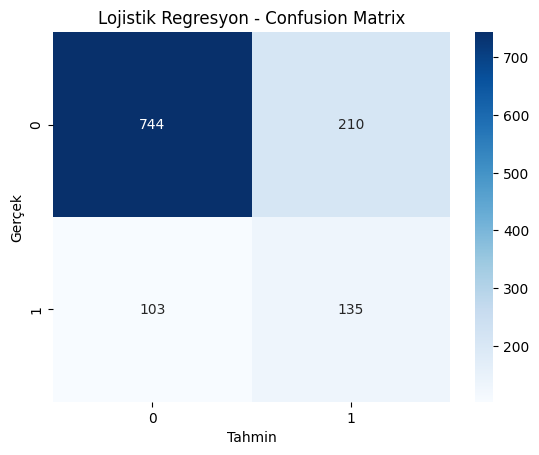

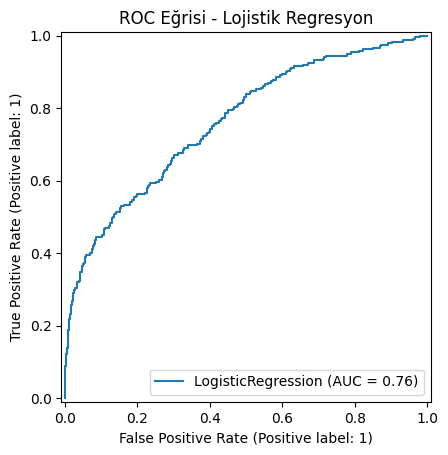

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.88      0.78      0.83       954
           1       0.39      0.57      0.46       238

    accuracy                           0.74      1192
   macro avg       0.63      0.67      0.64      1192
weighted avg       0.78      0.74      0.75      1192



In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Modeli eğit
lr_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lr_model.fit(X_train, y_train)

# Tahmin ve olasılık
y_pred = lr_model.predict(X_test)
y_prob = lr_model.predict_proba(X_test)[:, 1]

# Metrikler
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Lojistik Regresyon - Confusion Matrix")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.show()

# ROC Eğrisi
RocCurveDisplay.from_estimator(lr_model, X_test, y_test)
plt.title("ROC Eğrisi - Lojistik Regresyon")
plt.show()
# Sınıflandırma raporu
print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred))

# 📘 RandomForest Model Gelistirme

In [3]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Veri yükleniyor
df = pd.read_csv("hmeq.csv")

# Eksik kategorik veriler 'Unknown' ile dolduruluyor
df['REASON'] = df['REASON'].fillna("Unknown")
df['JOB'] = df['JOB'].fillna("Unknown")

# Sayısal değişkenler seçiliyor (BAD hariç)
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('BAD')
imputer = IterativeImputer(random_state=42)
df[num_cols] = imputer.fit_transform(df[num_cols])

# Kategorik veriler encode ediliyor
le = LabelEncoder()
df['REASON'] = le.fit_transform(df['REASON'])
df['JOB'] = le.fit_transform(df['JOB'])

# X ve y ayrımı
X = df.drop('BAD', axis=1)
y = df['BAD']

# Sayısal veriler ölçekleniyor
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# Eğitim/test ayrımı
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


c:\Users\ahmet\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [4]:
from sklearn.ensemble import RandomForestClassifier

# Model tanımlanıyor (varsayılan parametrelerle)
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Tahmin yapılıyor
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]


In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Metrikler
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))


Accuracy: 0.912751677852349
Precision: 0.9466666666666667
Recall: 0.5966386554621849
F1 Score: 0.7319587628865979
ROC AUC: 0.96413596885295


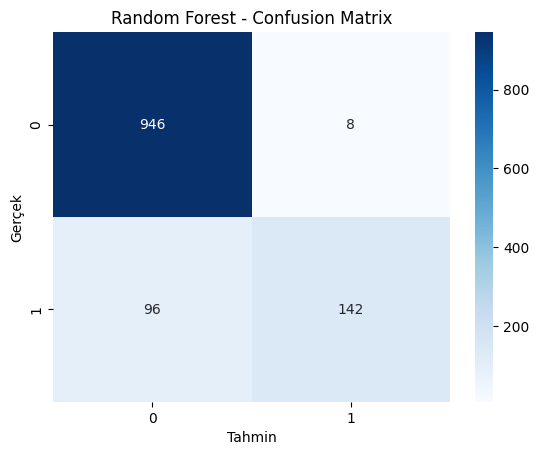

In [6]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.show()


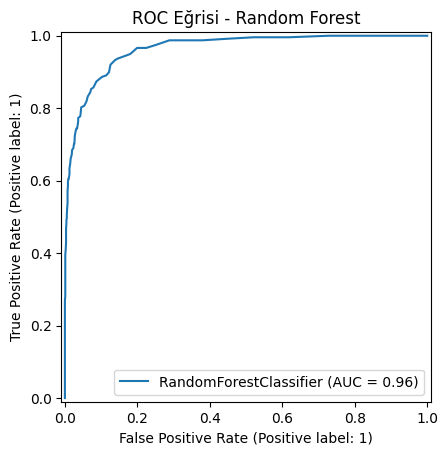

In [7]:
#ROC Eğrisi
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(rf_model, X_test, y_test)
plt.title("ROC Eğrisi - Random Forest")
plt.show()


In [8]:
from sklearn.metrics import classification_report

print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_rf))



Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       954
           1       0.95      0.60      0.73       238

    accuracy                           0.91      1192
   macro avg       0.93      0.79      0.84      1192
weighted avg       0.92      0.91      0.90      1192



# 📘 XGBoost Model Gelistirme

In [9]:
# Gerekli kütüphaneler yükleniyor
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier

In [10]:
# Veri yükleniyor
df = pd.read_csv("hmeq.csv")

# Kategorik eksik veriler 'Unknown' etiketiyle dolduruluyor
df['REASON'] = df['REASON'].fillna("Unknown")
df['JOB'] = df['JOB'].fillna("Unknown")

# Sayısal değişkenler (BAD hariç) seçiliyor ve eksik değerler model tabanlı dolduruluyor
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('BAD')
imputer = IterativeImputer(random_state=42)
df[num_cols] = imputer.fit_transform(df[num_cols])

# Kategorik veriler sayısallaştırılıyor (Label Encoding)
le = LabelEncoder()
df['REASON'] = le.fit_transform(df['REASON'])
df['JOB'] = le.fit_transform(df['JOB'])


c:\Users\ahmet\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [11]:
# Özellikler ve hedef değişken ayrılıyor
X = df.drop('BAD', axis=1)
y = df['BAD']

# Sayısal sütunlar standartlaştırılıyor
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [13]:
xgb_model = XGBClassifier(
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [15]:
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]  # BAD=1 olasılığı

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))


Accuracy: 0.9177852348993288
Precision: 0.9117647058823529
Recall: 0.6512605042016807
F1 Score: 0.7598039215686274
ROC AUC: 0.9460652185402463


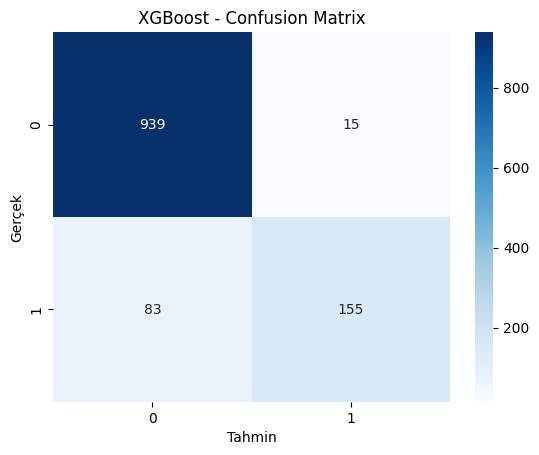

In [16]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.show()


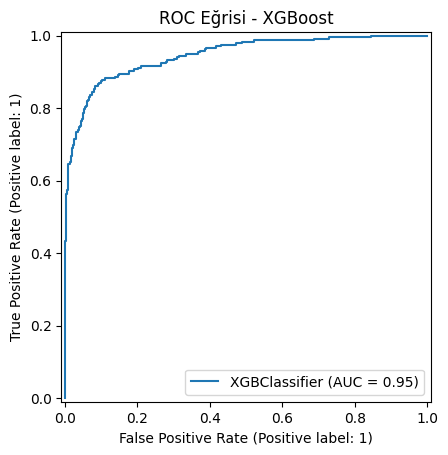

In [17]:
RocCurveDisplay.from_estimator(xgb_model, X_test, y_test)
plt.title("ROC Eğrisi - XGBoost")
plt.show()


In [18]:
print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred))


Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       954
           1       0.91      0.65      0.76       238

    accuracy                           0.92      1192
   macro avg       0.92      0.82      0.86      1192
weighted avg       0.92      0.92      0.91      1192



# 📘 XGBoost Hiperparametre Optimizasyonu GridSearchCV

In [16]:
# XGBoost – RandomizedSearchCV ile Hiperparametre Optimizasyonu (CV=3)
#Bu bölümde XGBoost algoritmasının hiperparametreleri, rastgele örnekleme (RandomizedSearchCV) ve 3 katlı çapraz doğrulama ile optimize edilecektir.

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import time
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Veri yükleniyor
df = pd.read_csv("hmeq.csv")

# Eksik kategorik veriler
df['REASON'] = df['REASON'].fillna("Unknown")
df['JOB'] = df['JOB'].fillna("Unknown")

# Sayısal veriler dolduruluyor
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('BAD')
imputer = IterativeImputer(random_state=42)
df[num_cols] = imputer.fit_transform(df[num_cols])

# Label encoding
le = LabelEncoder()
df['REASON'] = le.fit_transform(df['REASON'])
df['JOB'] = le.fit_transform(df['JOB'])

# X, y ayrımı
X = df.drop('BAD', axis=1)
y = df['BAD']

# Ölçekleme
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# Eğitim/test ayrımı
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


c:\Users\ahmet\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [ ]:
# Parametre aralıkları tanımlanıyor
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'min_child_weight': [1, 3, 5],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2]
}


In [19]:
# Model nesnesi
xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)

# Random Search kurulumu
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,            # 50 rastgele kombinasyon dene
    scoring='f1',
    cv=3,                 # 3 katlı çapraz doğrulama
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Eğitim süresi ölçülüyor
start = time.time()
random_search.fit(X_train, y_train)
end = time.time()

print(f"RandomizedSearchCV süresi: {end - start:.2f} saniye")


Fitting 3 folds for each of 50 candidates, totalling 150 fits


c:\Users\ahmet\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:47:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


RandomizedSearchCV süresi: 11.77 saniye


In [20]:
print("En iyi parametreler:")
print(random_search.best_params_)

# En iyi model
best_xgb = random_search.best_estimator_


En iyi parametreler:
{'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 0.5, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.6}


In [21]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix,
    classification_report, RocCurveDisplay
)

y_pred_best_xgb = best_xgb.predict(X_test)
y_prob_best_xgb = best_xgb.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred_best_xgb))
print("Precision:", precision_score(y_test, y_pred_best_xgb))
print("Recall:", recall_score(y_test, y_pred_best_xgb))
print("F1 Score:", f1_score(y_test, y_pred_best_xgb))
print("ROC AUC:", roc_auc_score(y_test, y_prob_best_xgb))



Accuracy: 0.9278523489932886
Precision: 0.9578313253012049
Recall: 0.6680672268907563
F1 Score: 0.7871287128712872
ROC AUC: 0.9578378521219808


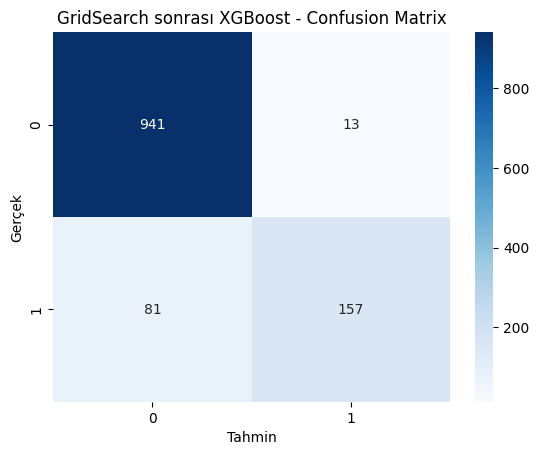

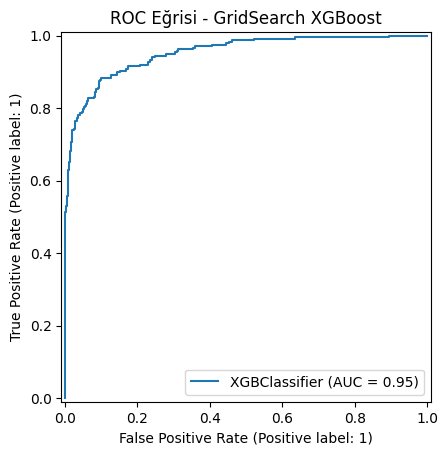

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

cm_best_xgb = confusion_matrix(y_test, y_pred_best_xgb)
sns.heatmap(cm_best_xgb, annot=True, fmt='d', cmap='Blues')
plt.title("GridSearch sonrası XGBoost - Confusion Matrix")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.show()

RocCurveDisplay.from_estimator(best_xgb, X_test, y_test)
plt.title("ROC Eğrisi - GridSearch XGBoost")
plt.show()


# 📘 Gözetimsiz Ogrenme KMeans Kümeleme

In [2]:
# Gerekli kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.experimental import enable_iterative_imputer  # ✳️ Bu satır şart
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Veriyi yükle
df = pd.read_csv("hmeq.csv")

# Eksik kategorik verileri doldur
df['REASON'] = df['REASON'].fillna("Unknown")
df['JOB'] = df['JOB'].fillna("Unknown")

# Sayısal kolonları impute et (BAD hariç)
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('BAD')
imputer = IterativeImputer(random_state=42)
df[num_cols] = imputer.fit_transform(df[num_cols])

# Kategorik değişkenleri sayısallaştır
df['REASON'] = LabelEncoder().fit_transform(df['REASON'])
df['JOB'] = LabelEncoder().fit_transform(df['JOB'])

# Gözetimsiz öğrenme için BAD kolonunu çıkar
X_unsup = df.drop('BAD', axis=1)

# Sayısal verileri ölçekle
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_unsup)


c:\Users\ahmet\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


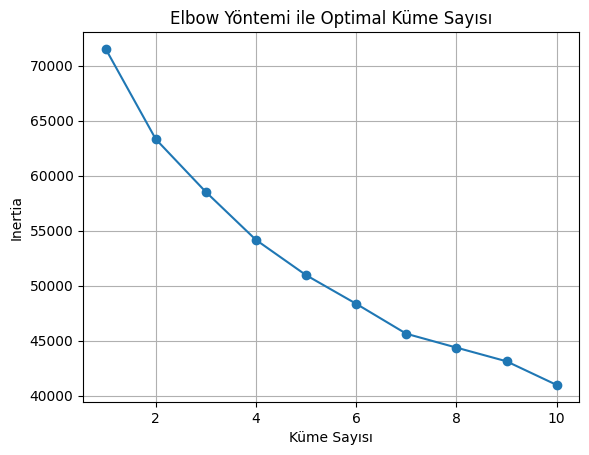

In [3]:
# Elbow yöntemiyle ideal K sayısını belirle
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Grafikle elbow noktası göster
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Yöntemi ile Optimal Küme Sayısı")
plt.xlabel("Küme Sayısı")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# 3 küme ile KMeans uygulaması
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMEANS_CLUSTER'] = kmeans.fit_predict(X_scaled)


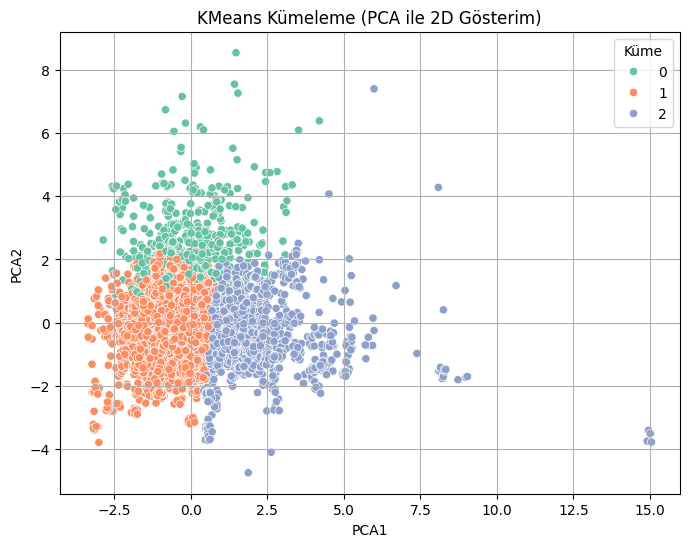

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,PCA1,PCA2
KMEANS_CLUSTER,,,,,,,,,,,,,,,
0,0.59,17820.68,60255.91,88046.08,0.27,1.70,7.69,1.69,2.18,149.07,3.48,24.38,36.31,0.01,2.39
1,0.17,15889.39,53185.84,79414.70,0.42,2.15,8.92,0.12,0.25,165.83,0.88,18.35,32.63,-0.72,-0.19
2,0.14,26514.34,124513.71,169658.30,0.32,2.19,9.77,0.11,0.33,227.06,1.13,28.11,36.24,2.00,-0.41


In [4]:
# PCA ile 2 boyuta indir ve görselleştir
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
df["PCA1"], df["PCA2"] = pca_result[:, 0], pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="KMEANS_CLUSTER", palette="Set2")
plt.title("KMeans Kümeleme (PCA ile 2D Gösterim)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(title="Küme")
plt.grid(True)
plt.show()

# Her kümenin ortalama profiline bakalım
df.groupby("KMEANS_CLUSTER").mean().round(2)
